Notebook with the code to calculate the fragmentation of the intermetallic particles individually


In [64]:
# Load packages

# For function declarations
import IMCFunctions as fct
import importlib
importlib.reload(fct)

# For data management
import numpy as np
import pandas as pd
import xarray as xr
import h5py
import pickle

# For image analysis 

import skimage as sk
from skimage.measure import label, regionprops, find_contours,  perimeter
from skimage.draw import polygon_perimeter
from scipy.spatial.distance import cdist
import scipy
from skimage import draw
from scipy.spatial import ConvexHull
from skimage import measure, morphology


# for visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines

import seaborn as sns
import matplotlib.colors as mcolors
from PIL import Image


# for math
import math
import random
import re






Import the segmented images to identify the particles and their properties. 
The properties are exported to a pickle file that can be directly imported to skip the particle identification step

In [65]:

file_name =  "Segmented_Images/AH_AA6014_Segmentation.h5" 
file_name =  "Segmented_Images/AH_AA6170_Segmentation.h5" 

conversion_factor = 21.5 # Conversion factor that is the number of pixels/um

segmentation= fct.import_segmentation_data_h5(file_name)
properties, labeled_image = fct.identify_particle_properties(segmentation, conversion_factor)
area = fct.get_area(segmentation, conversion_factor)


fct.save_to_pickle((area, properties), "properties_AA6170_center")

Number of particles 248


In [66]:
area, properties = fct.read_from_pickle("properties_AA6170_center") 

Xarray object loaded from pickles/properties_AA6170_center


Get the strain values from the rolling simulations

In [67]:
file_list = [
    "Rolling_Simulations/E23849_N-15.xlsx",
    "Rolling_Simulations/E23849_N-14.xlsx",
    "Rolling_Simulations/E23849_N-13.xlsx",
    "Rolling_Simulations/E23849_N-12.xlsx",
    "Rolling_Simulations/E23849_N-11.xlsx",
    "Rolling_Simulations/E23849_N-10.xlsx",
    "Rolling_Simulations/E23849_N-9.xlsx",
    "Rolling_Simulations/E23849_N-8.xlsx",
    "Rolling_Simulations/E23849_N-7.xlsx",
    "Rolling_Simulations/E23849_N-6.xlsx",
    "Rolling_Simulations/E23849_N-5.xlsx",
    "Rolling_Simulations/E23849_N-4.xlsx",
    "Rolling_Simulations/E23849_N-3.xlsx",
    "Rolling_Simulations/E23849_N-2.xlsx",
    "Rolling_Simulations/E23849_N-1.xlsx",
    "Rolling_Simulations/E23849_N.xlsx"
]



list_strains_center = fct.get_strain_list_center(file_list)
list_strains_edge = fct.get_strain_list_edge(file_list)

In [68]:
area, properties = fct.read_from_pickle("properties_AA6170_center") 

Xarray object loaded from pickles/properties_AA6170_center


Run the model on the as homogenized image. 

The parameters input to the `multirun_full_code_probabreak` are :
- The array containing the particle properties
- The number of rolling steps ( should be larger or equal to the number of strain values in the list of strain values)
- The smallest particle size (μm)
- The list of the strain values
- number of times the fragmentation model is run

In [ ]:
output_multirun, probas = fct.multirun_full_code_probabreak(properties, 16, 0.1, list_strains_center, 2)

Rolling step 1
Rolling step 2
Rolling step 3
Rolling step 4
Rolling step 5
Rolling step 6
Rolling step 7
Rolling step 8
Rolling step 9
Rolling step 10
Rolling step 11
Rolling step 12
Rolling step 13
Rolling step 14
Rolling step 15
Rolling step 16
completed 1 full runs 
Rolling step 1
Rolling step 2
Rolling step 3
Rolling step 4
Rolling step 5
Rolling step 6
Rolling step 7
Rolling step 8
Rolling step 9
Rolling step 10
Rolling step 11
Rolling step 12
Rolling step 13
Rolling step 14
Rolling step 15
Rolling step 16
completed 2 full runs 


Simulated data (property: orientation_deg):
  Average: 9.7976
  Standard Deviation: 5.6254
  Total Number Density: 0


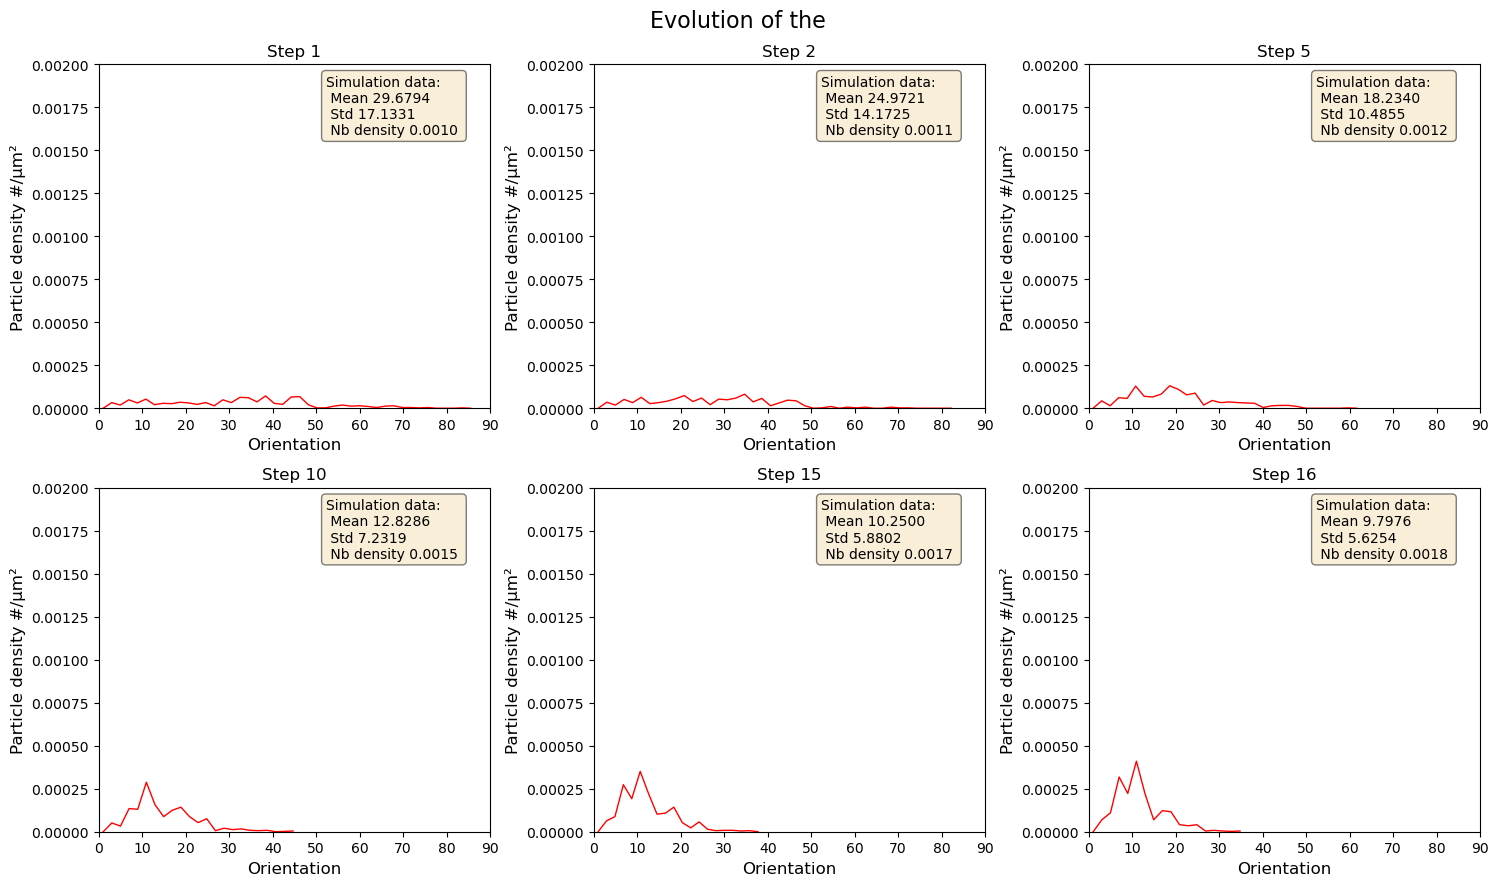

In [63]:
sim_area = area * 2

fct.multiplot_sims(output_multirun, sim_area, "orientation_deg", "Orientation")